In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [5]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

## Loading the dataset

In [6]:
df = pd.read_csv(r"C:\Users\sachi\Downloads\day (1).csv")

In [7]:
# reading the csv file
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.181250,80.583300,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.686950,69.608700,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.470250,43.727300,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.606100,59.043500,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.463500,43.695700,12.522300,82,1518,1600


In [8]:
print(f'Given dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Given dataset contains 730 rows and 16 columns.


In [9]:
# checked for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- We can check here No Null values.

In [10]:
# Checking for duplicate vlaues.
len(df[df.duplicated()])

0

- No Duplicate found as well

## Dropping features based on shared logic

In [11]:
drop_col = ['instant','dteday' ]

# creating a loop to drop the calumns
for i in df.columns:
    if i in drop_col:
        df.drop(labels= i, axis= 1, inplace= True)

In [12]:
#chekcing the data after dropping the columns
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.181250,80.583300,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.686950,69.608700,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.470250,43.727300,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.606100,59.043500,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.463500,43.695700,12.522300,82,1518,1600


In [13]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [14]:
# changing the int value to string as requested 

# changing the weathersit 
df['weathersit'] = df['weathersit'].map({1: 'Clear, Partly Cloudy', 2: 'Misty and Cloudy', 
                                         3: 'Light Rain or snow', 4: 'Heavy Rain or snow'} )

#changing the season
df['season'] = df['season'].map({1: 'spring', 2:'summer', 3:'fall', 4:'winter'})

#changing the mnth
df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
# changing the weekday

df['weekday'] = df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.181250,80.583300,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.686950,69.608700,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,"Clear, Partly Cloudy",8.050924,9.470250,43.727300,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,"Clear, Partly Cloudy",8.200000,10.606100,59.043500,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,"Clear, Partly Cloudy",9.305237,11.463500,43.695700,12.522300,82,1518,1600


## Exploratory Data Analysis (EDA) 

### Univariate Analysis:

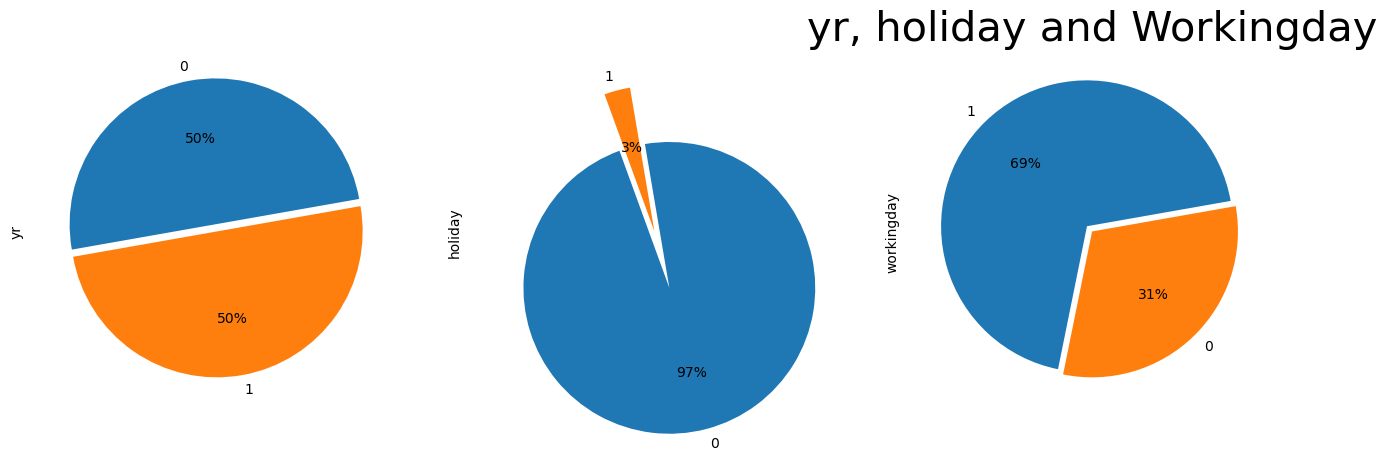

In [16]:
plt.figure(figsize = [16,15])
plt.subplot(131)
df['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
df['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
df['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('yr, holiday and Workingday',fontsize=30)
plt.show()

- Here in the first Pie chart we can see 'yr' is 50%-50% for both the years
- on the seconf Pie chart wecan see a huge difrent here we can say users of the bike is more on  non-holidays(0)
- The same thing here as as 2nd pie chart 'workingday' is higher number as compare to  non-working days.


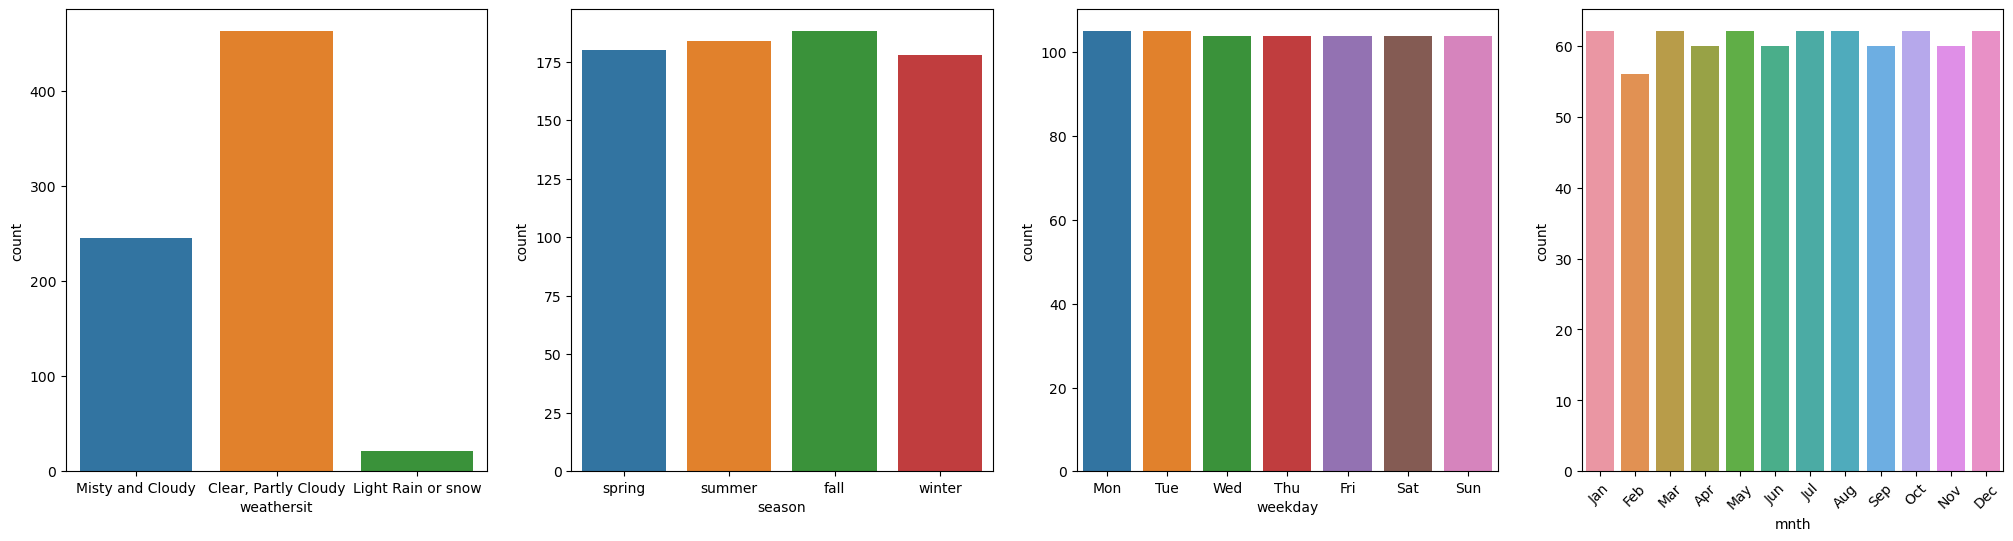

In [17]:
plt.figure(figsize = [25,6])
plt.subplot(141)
sns.countplot(data = df, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = df, x = 'season')
plt.subplot(143)
sns.countplot(data = df, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'mnth')
plt.show()

- We can say when where is clear and mist_sloudy the users is more than Light_snow_rain
- Rest other values are almost same

## Bivariate Analysis:

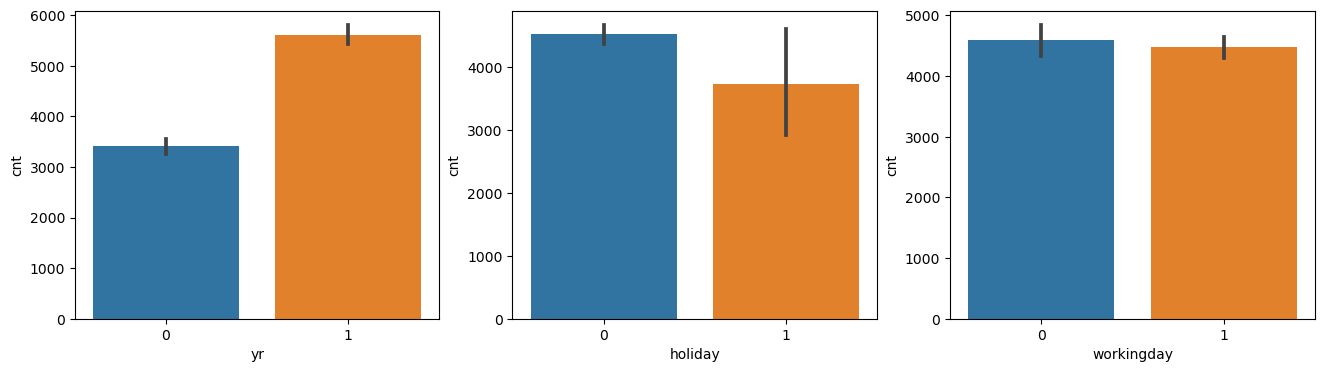

In [18]:
#let's check with our Target value cnt
plt.figure(figsize = [16,4])
plt.subplot(131)
sns.barplot('yr', 'cnt', data = df )
plt.subplot(132)
sns.barplot('holiday', 'cnt', data = df)
plt.subplot(133)
sns.barplot('workingday', 'cnt', data = df)
plt.show()

- 'Yr' we can say there is a increse of  users on year
- More users on holidays(0) as compared to Non holidays(1).
- on Workingday we can say it's almote same 

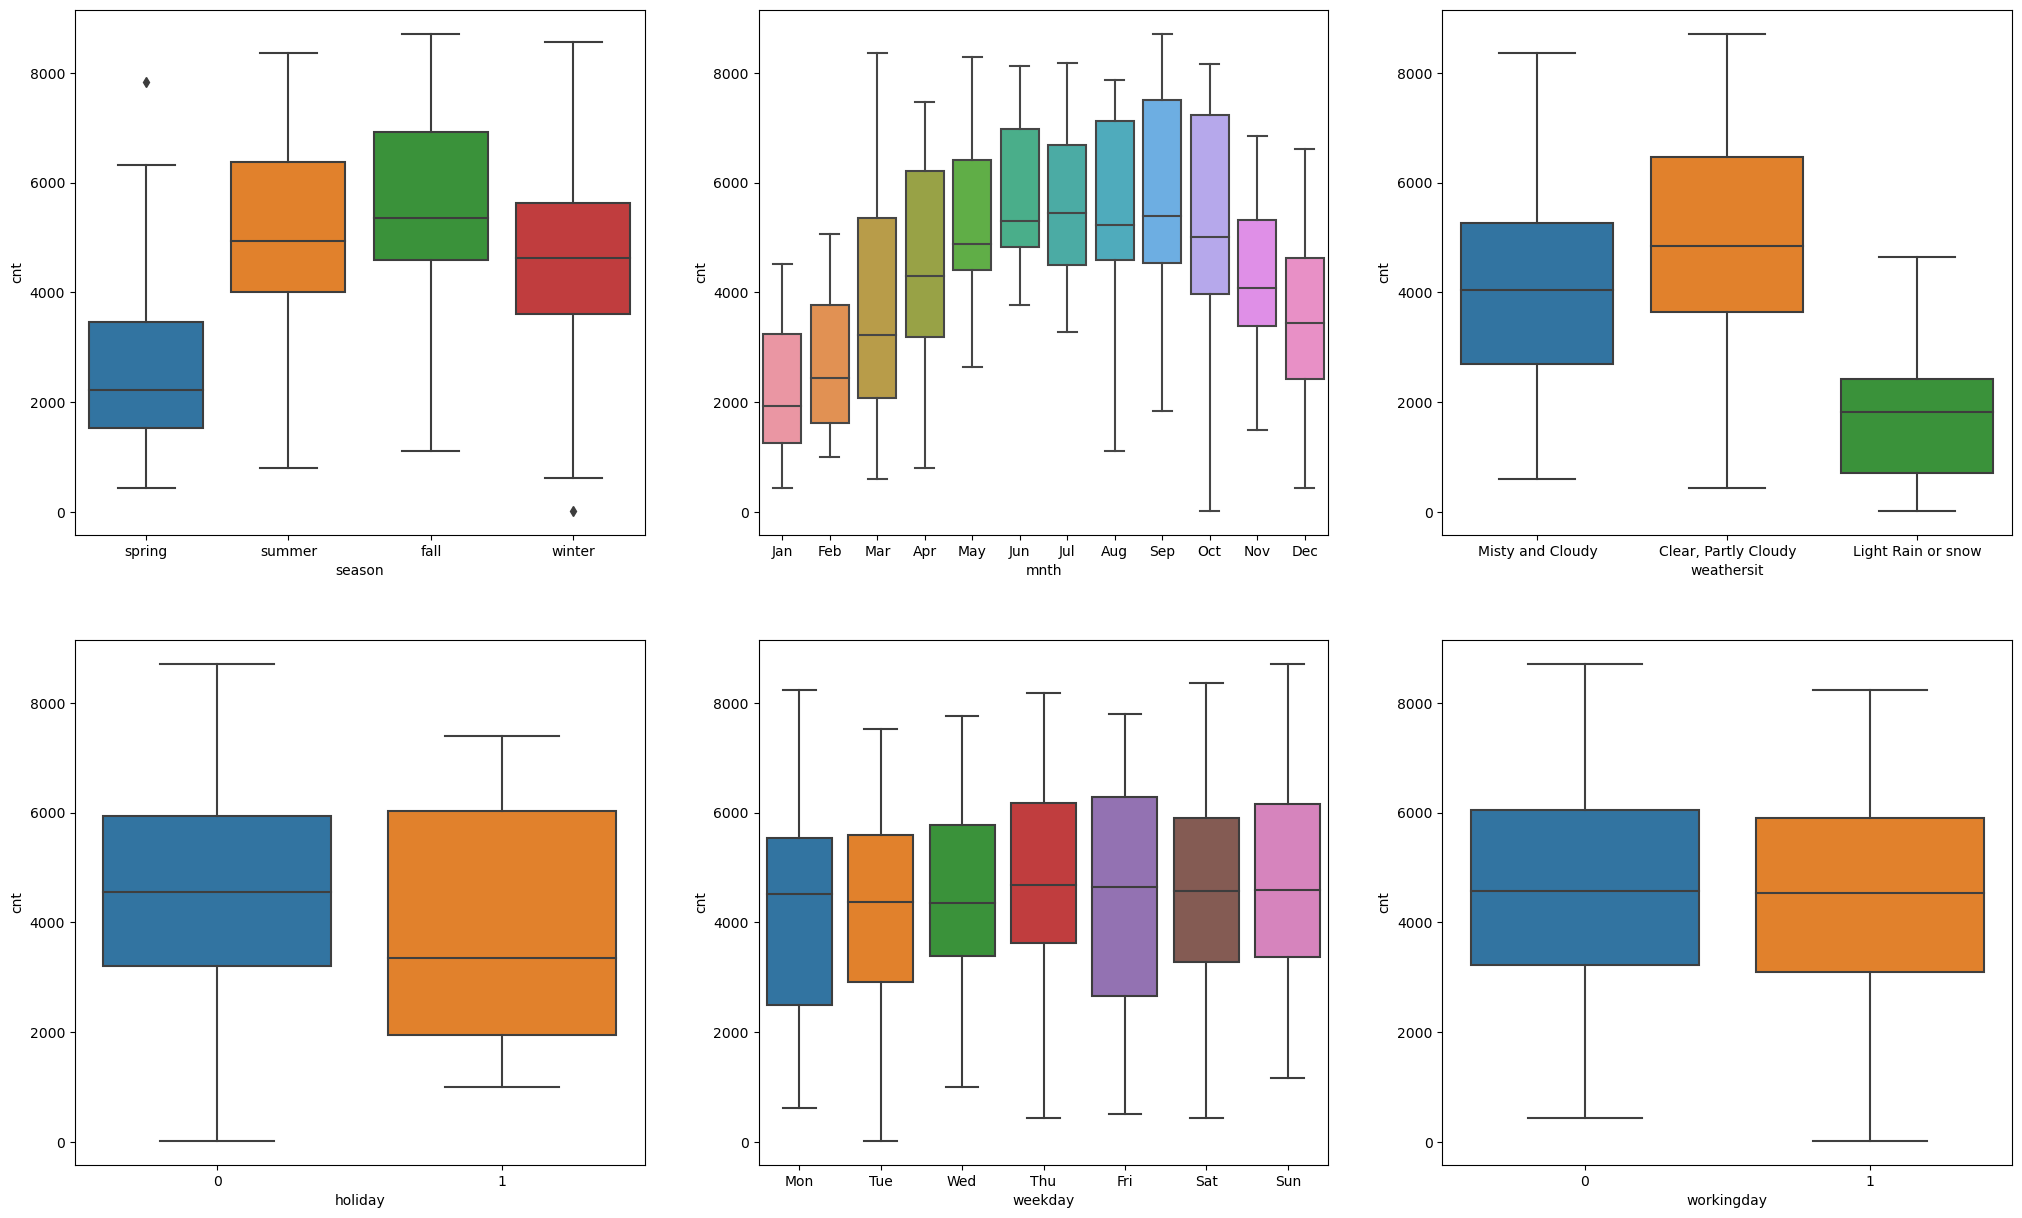

In [19]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

- here we can check the Season Spring have the low bookings, Fall have the higest bookings 
- mnth we can check in few months the bookings are more 
- clarely Light_snow_rain have the low bookings othe 2 have almost same bookings
-  bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
- weekday variable shows very close trend.
- most of the bike booking were happening in ‘workingday’.

#### As our target 'cnt' is a summation of 'casual' and 'registered' Hence dropping the 'casual' and 'registered' Columns

In [20]:
df.drop(labels= ['casual', 'registered'], axis = 1, inplace = True)

In [21]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.181250,80.583300,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.686950,69.608700,16.652113,801
2,spring,0,Jan,0,Wed,1,"Clear, Partly Cloudy",8.050924,9.470250,43.727300,16.636703,1349
3,spring,0,Jan,0,Thu,1,"Clear, Partly Cloudy",8.200000,10.606100,59.043500,10.739832,1562
4,spring,0,Jan,0,Fri,1,"Clear, Partly Cloudy",9.305237,11.463500,43.695700,12.522300,1600


- Here we can check the changes are made 
- We have dropped the unwantted features from out data 
- We can noe go ahead to create Dummy variables and then we can crate model using the same 

## Checking Correlation:

<Figure size 1500x3000 with 0 Axes>

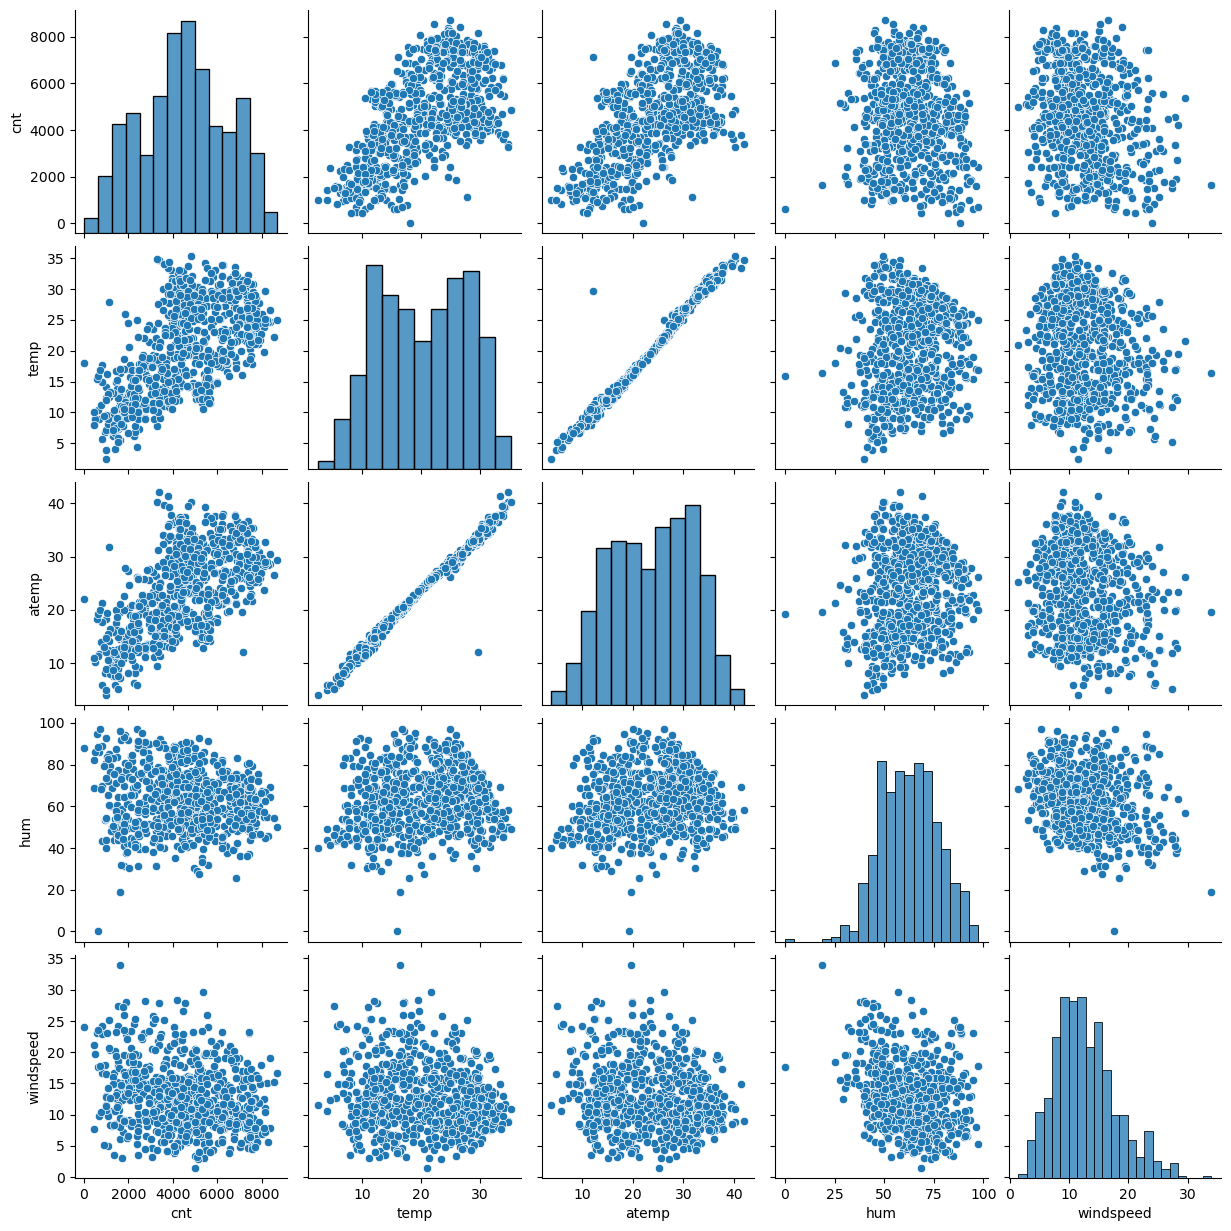

In [22]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

##### Observation
- temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

<Figure size 2000x1500 with 0 Axes>

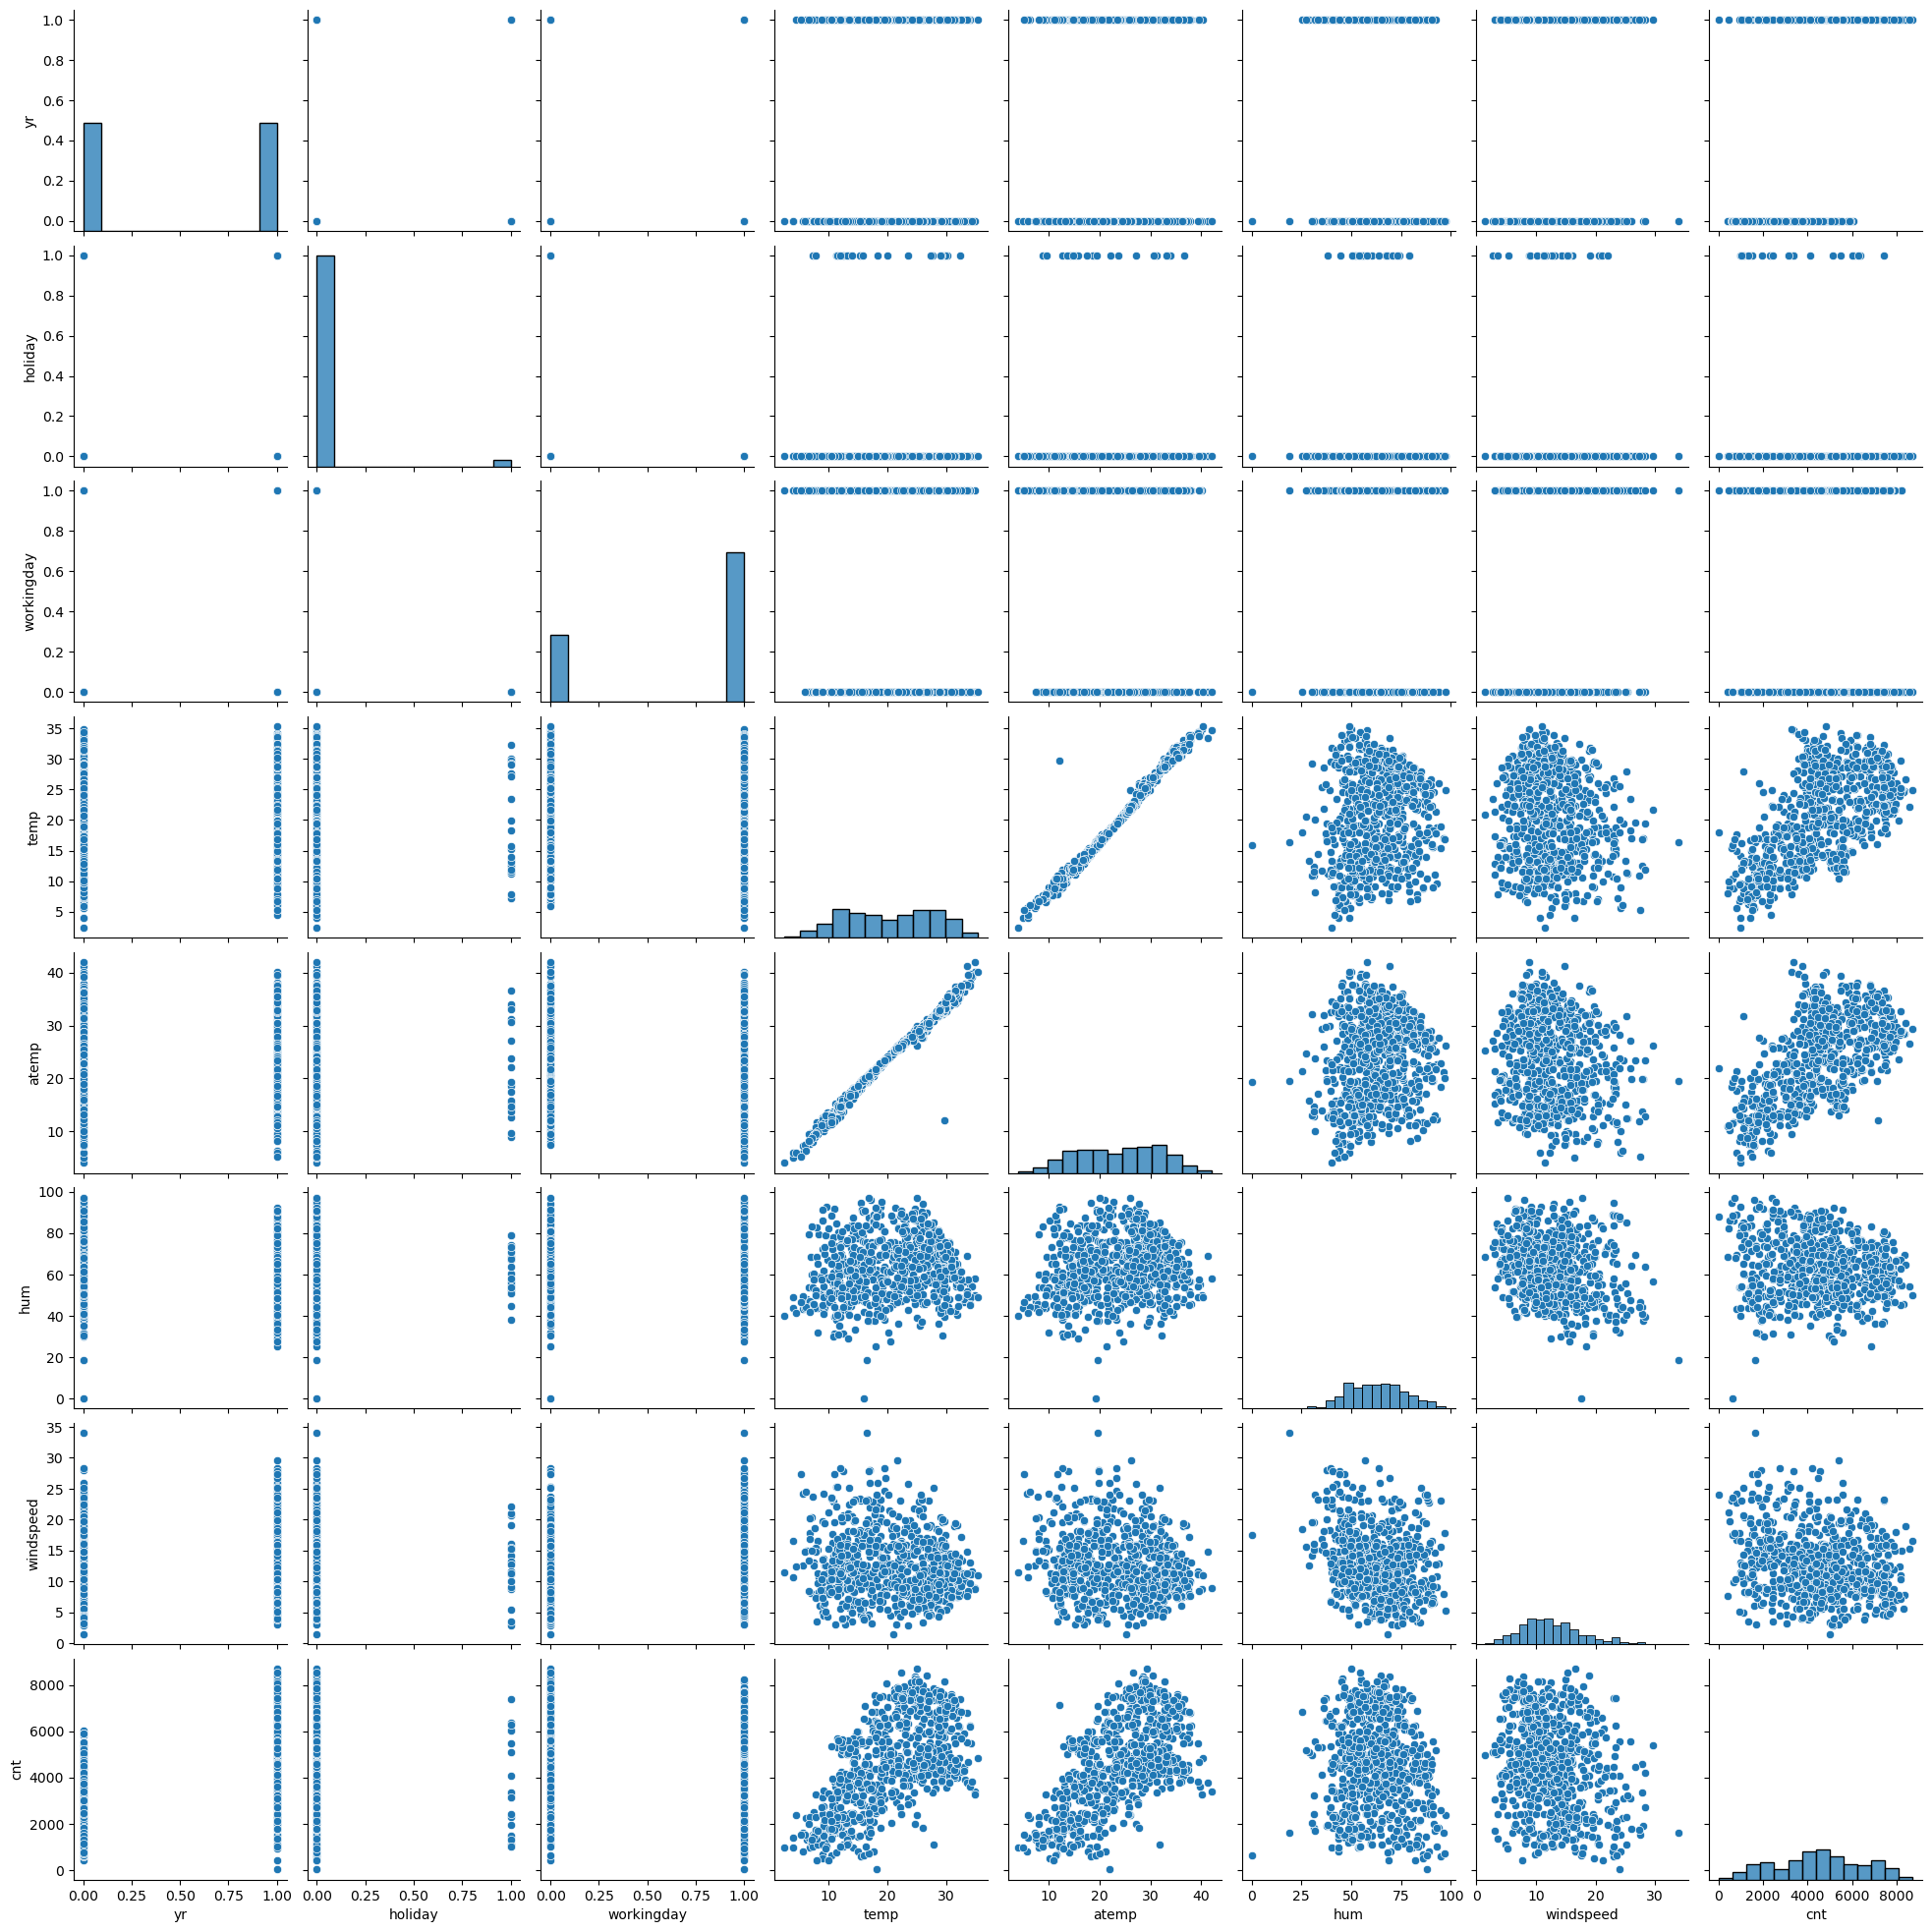

In [23]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

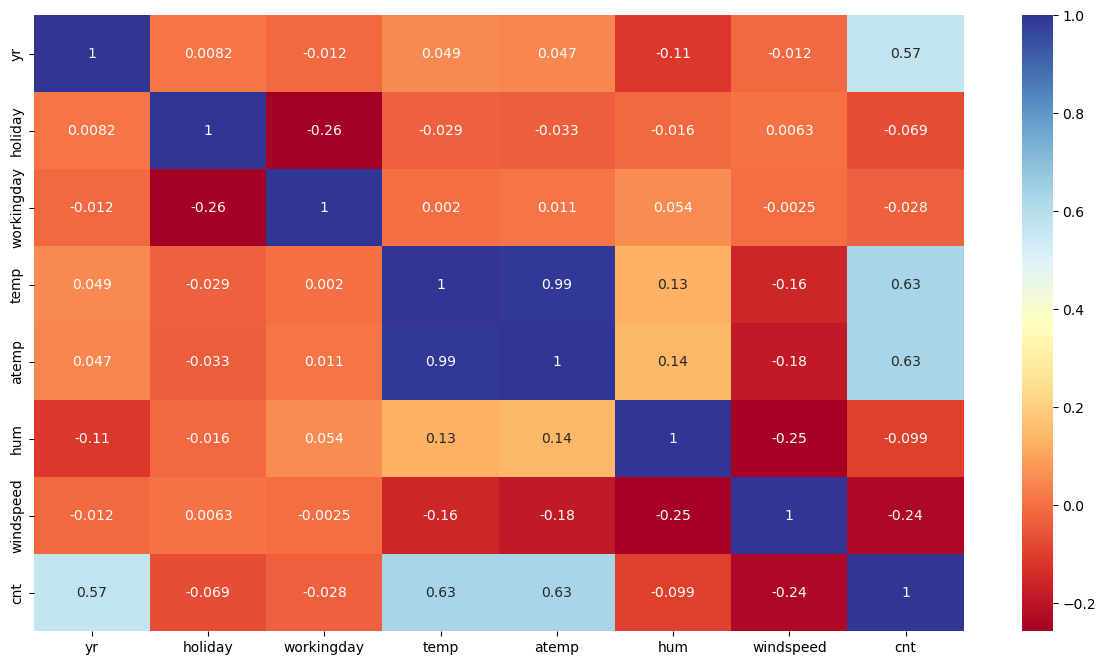

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap="RdYlBu")
plt.show()


- The above correlation plot tells us that there is a high correlation between 'temp','atemp' vs 'cnt'


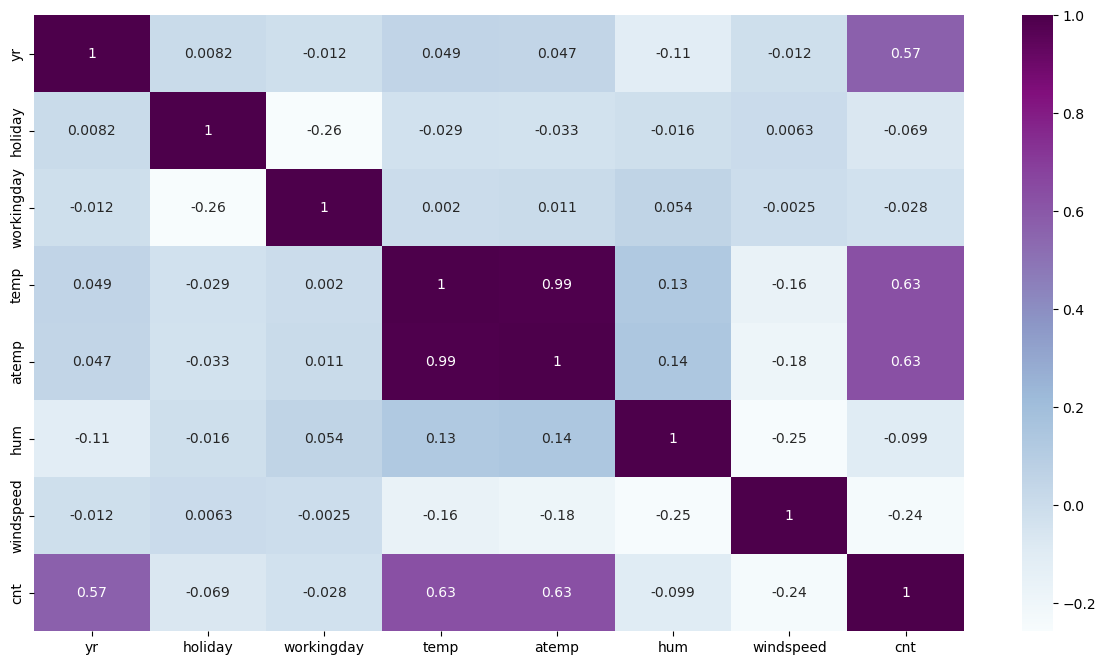

In [25]:
# Let's now check the correlation coefficients
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap="BuPu")
plt.show()

   - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.



## Chekcing the Growth over the last year

In [26]:
#creating a ne dataframe showing monthly growth ovet the last year

last_yr = df.pivot_table(index = 'mnth', columns = 'yr', values = 'cnt', aggfunc = 'mean')

#renaming the coulumns
last_yr.columns = ['2018', '2019']

#Growth cloumns in %
last_yr['percent growth'] = round(((last_yr['2019']- last_yr['2018'])/last_yr['2018'])*100, 2)

#sorting the dataframe
last_yr = last_yr.sort_values(by= 'percent growth', ascending = False)

#checking the result
last_yr

,2018,2019,percent growth
mnth,,,
Mar,2065.967742,5318.548387,157.440000
Jan,1231.903226,3120.774194,153.330000
Feb,1721.964286,3617.964286,110.110000
Apr,3162.333333,5807.466667,83.640000
Sep,4247.266667,7285.766667,71.540000
Oct,3984.225806,6414.225806,60.990000
Aug,4409.387097,6919.451613,56.930000
Nov,3405.566667,5088.800000,49.430000
May,4381.322581,6318.225806,44.210000


#### let's plot it for better understanding

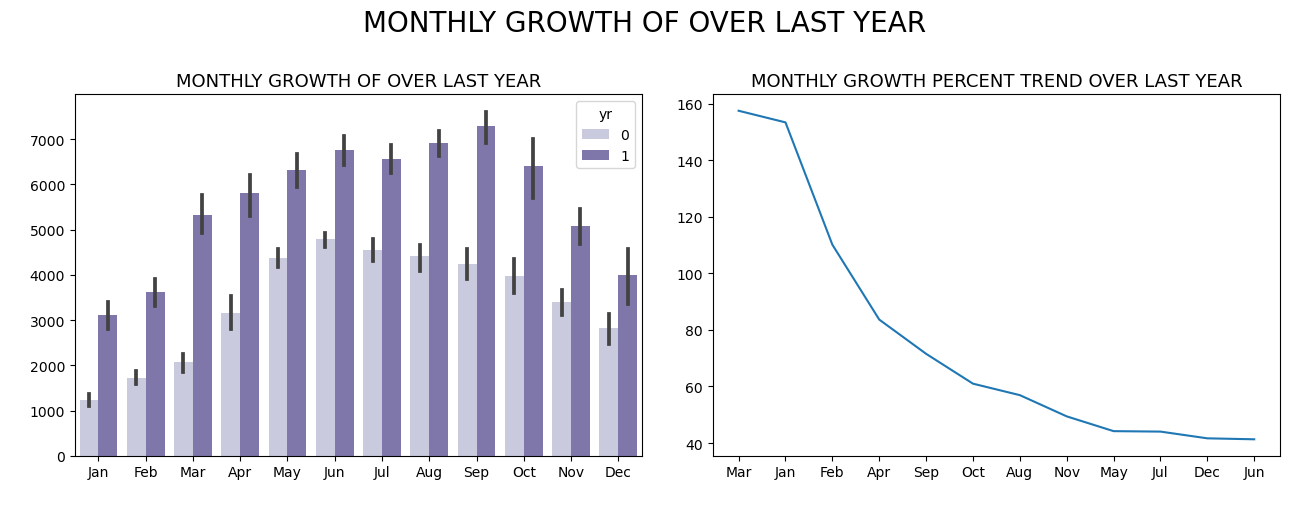

In [27]:
#Subplotting 
fig, ax = plt.subplots(nrows= 1, ncols =2, figsize= (13, 5))

#title of the plotting
plt.suptitle('Monthly Growth of over last year'.upper(), fontsize= 20, y = 1.01)

#plot 1
sns.barplot(x ='mnth',y='cnt', data = df, hue ='yr' , ax =ax[0], palette ='Purples')
ax[0].set_ylabel('  ')
ax[0].set_xlabel('  ')
ax[0].set_title('Monthly Growth of over last year'.upper(), fontsize= 13)

#plot 2
sns.lineplot(x =last_yr.index, y = last_yr['percent growth'],ax =ax[1], palette = 'Purples')
ax[1].set_ylabel('  ')
ax[1].set_xlabel('  ')
ax[1].set_title('Monthly Growth percent trend over last year'.upper(), fontsize= 13)

# final plotting
plt.tight_layout()
plt.show()

## Further model devlopment approach

#### Machine Learning Problem
- Relationship of the target variable found with temp, atemp, hum, windspeed
- Target variable found correlated with date, season, mnth as depicted on earler barplot.
- Based on the above, it's proven that this qualifies as a Machine Learning Problem since the output depends on the Independent 
  feature and historical records

#### supervised and unsupervised
- We have target variable available hence it is a Supervised Learning Problem.

#### Regression
- Given Target variable'cnt' is continuous hence the problem qulifies for Regression Problem.

### Multiple Independent Features
- from the given variable we now know that the Target variable is dependent on multipule freature. Hence, now we can say it is a Multiple leaner regression problem.

# Using Multiple Leaner Regression for our Model Devlopment

In [28]:
#checking the final data
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.181250,80.583300,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.686950,69.608700,16.652113,801
2,spring,0,Jan,0,Wed,1,"Clear, Partly Cloudy",8.050924,9.470250,43.727300,16.636703,1349
3,spring,0,Jan,0,Thu,1,"Clear, Partly Cloudy",8.200000,10.606100,59.043500,10.739832,1562
4,spring,0,Jan,0,Fri,1,"Clear, Partly Cloudy",9.305237,11.463500,43.695700,12.522300,1600


###### Observation
- yr, holiday, workingday are binary variables

## Creating Dummy Variables

In [29]:
# creating a new dataframe for Machine Learning Algorithm
df_ml = df.copy()

In [30]:
# creating a list for the feature which needs to be converted as dummy variables.
dummy_list = [i for i in df_ml.select_dtypes(include ='object').columns]

# creating dummies
for i in dummy_list:
    my_df = pd.get_dummies(data= df_ml[i], drop_first = True)
    df_ml = pd.concat([df_ml, my_df], axis = 1).drop(labels = i, axis = 1)


In [31]:
#checking the dummy data

df_ml.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or snow,Misty and Cloudy
0,0,0,1,14.110847,18.181250,80.583300,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.686950,69.608700,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.470250,43.727300,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.606100,59.043500,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.463500,43.695700,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [32]:
b_train, b_test = train_test_split(df_ml, test_size = 0.30, random_state= 100)

In [33]:
print(f'Train set:{b_train.shape}')
print(f'Test set:{b_test.shape}')

Train set:(511, 30)
Test set:(219, 30)


- By adding the Test and Train set in=t gives us the total of df_ml. Hence the Rows are properly divided into Train and test.
- Number of columns are same as well

In [34]:
b_train.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or snow,Misty and Cloudy
224,0,0,1,28.119153,32.292900,72.958300,14.167418,4150,0,0,...,0,0,1,0,0,0,0,0,0,1
199,0,0,1,31.843347,37.373950,65.041700,8.750200,4541,0,0,...,0,0,0,0,0,1,0,0,0,0
545,1,0,0,31.365000,34.375400,60.125000,10.791757,5687,0,0,...,0,0,0,0,1,0,0,0,0,0
245,0,0,1,27.435847,31.660650,71.666700,12.416775,4484,0,0,...,0,1,1,0,0,0,0,0,0,0
33,0,0,0,7.665237,8.893900,43.782600,18.609384,1550,1,0,...,0,0,0,1,0,0,0,0,0,0


## Rescaling of the data 


###### There are 2 type of rescaling  techniques
- Normalization is also called as Min Max Scaling it compress the feature between 0 and 1.
- Standardization moves the data in sucha a way that means becomes 0 and standard deviation becomes 1.

###### We will use the Min Max Scaler here as we have not handled the outliers as this rescaling technique will automaticaly handel them.

In [35]:
#Applying the Min Max Scaler ont eh training data
scaler = MinMaxScaler()

In [36]:
#scaling the variable nad storing in out datafraime.
scaler_list = [i for i in b_train.columns if b_train[i].nunique() > 2]

b_train[scaler_list]= scaler.fit_transform(b_train[scaler_list])


In [37]:
#checking the final data
b_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or snow,Misty and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


## Splitting the Training dataset in X and y.

In [38]:
y_train = b_train.pop('cnt')
X_train = b_train

In [39]:
#checking the shape of X_train and y_train.

print(f'X_train shape:{X_train.shape},y_train shape:{y_train.shape}')


X_train shape:(511, 29),y_train shape:(511,)


###### Here we can see the data have been splitted correctily 

In [40]:
#checking X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or snow,Misty and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [41]:
#checking y_train
y_train.head()

653   0.864243
576   0.827658
426   0.465255
728   0.204096
482   0.482973
Name: cnt, dtype: float64

## BUILDING LINEAR MODEL


## Recursive feature elimination (RFE) 

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()

#fitting model with X_train and y_train
lm.fit(X_train, y_train)

#creating RFE
rfe = RFE(estimator = lm,n_features_to_select=  15)

#converting rfe to fitted rfe
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light Rain or snow', True, 1),
 ('Misty and Cloudy', True, 1)]

###### Using above result to extract 15 most index intrain dataset

In [44]:
#checking other dataframe
temp_rfe_df = pd.DataFrame()

#Adding names to features
temp_rfe_df['col'] = X_train.columns

temp_rfe_df['RFE_support'] = rfe.support_

temp_rfe_df = temp_rfe_df[temp_rfe_df['RFE_support'] == True]

#checking the result
temp_rfe_df

,col,RFE_support
0,yr,True
1,holiday,True
3,temp,True
5,hum,True
6,windspeed,True
7,spring,True
8,summer,True
9,winter,True
11,Dec,True
13,Jan,True


In [45]:
#checking the list of feature that are need to be included in intial model
my_col = [i for i in temp_rfe_df['col']]

#checking the result
X_train[my_col].head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Light Rain or snow,Misty and Cloudy
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


## Model Devlopment

###### Variance Inflation Factor (VIF) : It is a measure of the amount of multicollinearity in regression analysis.

###### Ordinary least squares (OLS) : it aims to find the values of the linear regression model's parameters (i.e., the coefficients) that minimize the sum of the squared residuals

 During the model devlopment we will calculate them using VIF and then we will build regression model using OLS.
 
 ###### Let's now define the functions

In [46]:
def vif_table(dataframe):
    
    # Initiazile the dataframe
    vif = pd.DataFrame()
    
    # adding the dataframe
    vif['Feature'] = dataframe.columns
    
    # adding featur ViF values
    vif['VIF Value'] = [round(variance_inflation_factor(dataframe.values, i), 2) for i in range(len(dataframe.columns))]
    
    # sorting the dataframe
    vif = vif.sort_values(by= 'VIF Value', ascending= False)
    
    #Output
    return vif

In [47]:
#Defining function for Regression Statistics

def regmodel_ols(y_dataframe, X_dataframe):
    
    # adding constant 
    X_dataframe = sm.add_constant(X_dataframe)
    
    #Creating Liner Regression intance based on OLS and fitting the data and creating summary 
    lm = sm.OLS(y_dataframe, X_dataframe).fit()
    
    # Print Statistical Summary
    print(lm.summary())

In [48]:
# Initializing dataframe:
X_train_1 = X_train[my_col]

#### Let's build Our first Model.

In [49]:
regmodel_ols(y_train, X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          2.29e-189
Time:                        00:11:26   Log-Likelihood:                 514.84
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3206      0

###### Observation
- Adjusted R Squared is 0.840
- P value of all the variables are withtin the acceptable threshold of 0.05

In [50]:
# Checking the VIF values
vif_table(X_train_1)

,Feature,VIF Value
3,hum,30.930000
2,temp,17.820000
4,windspeed,4.730000
5,spring,4.370000
7,winter,4.060000
6,summer,2.820000
14,Misty and Cloudy,2.320000
0,yr,2.090000
11,Nov,1.830000
9,Jan,1.750000


###### Observation

- We can checjeck here hum and temp is very high and not in limit.
- Rest we can conceder out P-values are in acceptable limit

- So now we will drop hum to get a better model 

In [51]:
# dropping hum 
X_train_2 = X_train_1.drop(labels = 'hum' , axis = 1)

# Rebuilding the  Model
regmodel_ols(y_train, X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.41e-186
Time:                        00:11:26   Log-Likelihood:                 505.44
No. Observations:                 511   AIC:                            -980.9
Df Residuals:                     496   BIC:                            -917.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2457      0

In [52]:
#checking VIF values
vif_table(X_train_2)

,Feature,VIF Value
2,temp,5.180000
3,windspeed,4.670000
6,winter,2.940000
4,spring,2.890000
5,summer,2.240000
0,yr,2.080000
10,Nov,1.800000
8,Jan,1.660000
9,Jul,1.590000
13,Misty and Cloudy,1.560000


###### Observation
- Vlaue of 'temp'stil shows High 'VIF' value.
- On closer inspection found Summer, If droping this does not have any wrong impact to our R-Squared value Whereas dropping temp  will significantly affect out R-Squared value.
- Dropping Summer Feature

In [53]:
# Dropping summer as P-value is too high
X_train_3 = X_train_2.drop(labels = 'summer', axis = 1)

# Rebuilding the Model
regmodel_ols(y_train, X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.15e-186
Time:                        00:11:27   Log-Likelihood:                 502.90
No. Observations:                 511   AIC:                            -977.8
Df Residuals:                     497   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2902      0

###### Observation

- Now the imapact on R-sqared and adjusted R-squared values is acceptable 
- We still have Nov P-value more than 0.05

In [54]:
# checking VIF values
vif_table(X_train_3)

,Feature,VIF Value
2,temp,4.680000
3,windspeed,4.050000
5,winter,2.540000
4,spring,2.360000
0,yr,2.070000
9,Nov,1.800000
7,Jan,1.650000
12,Misty and Cloudy,1.530000
6,Dec,1.460000
8,Jul,1.360000


###### Observation

- Now all the values are within the limit for VIF 
- We will still need to drop Nov. so, we can have the final model

In [55]:
# Dropping Nov as P-value is too high
X_train_4 = X_train_3.drop(labels = 'Nov', axis = 1)

# Rebuilding the Model
regmodel_ols(y_train, X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          2.18e-186
Time:                        00:11:27   Log-Likelihood:                 499.46
No. Observations:                 511   AIC:                            -972.9
Df Residuals:                     498   BIC:                            -917.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2777      0

###### Observation

- Now we can check the decrease on the R-squared and adjusted R-squared
- we can see the change on Dec p-value

In [56]:
# checking VIF values
vif_table(X_train_4)

,Feature,VIF Value
2,temp,4.640000
3,windspeed,4.010000
4,spring,2.360000
0,yr,2.070000
5,winter,1.640000
7,Jan,1.640000
11,Misty and Cloudy,1.530000
8,Jul,1.360000
6,Dec,1.290000
9,Sep,1.200000


###### Observation
- However the VIf value are in limit the P-value of Dec is Very High 
- Hence dropping Dec

In [57]:
# Dropping Dec as P-value is too high
X_train_5 = X_train_4.drop(labels = 'Dec', axis = 1)

# Rebuilding the Model
regmodel_ols(y_train, X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     228.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.22e-186
Time:                        00:11:27   Log-Likelihood:                 497.23
No. Observations:                 511   AIC:                            -970.5
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2665      0

###### Observation

- Now we can check the decrease on the R-squared and adjusted R-squared
- we can see the change on Jan p-value

In [58]:
# checking VIF values
vif_table(X_train_5)

,Feature,VIF Value
2,temp,4.640000
3,windspeed,4.010000
4,spring,2.240000
0,yr,2.070000
6,Jan,1.600000
10,Misty and Cloudy,1.530000
5,winter,1.390000
7,Jul,1.360000
8,Sep,1.200000
9,Light Rain or snow,1.080000


###### Observation 

- we can check VIF values are all good
- Dropping Jan as High P-vlaue

In [59]:
# Dropping Jan as P-value is too high
X_train_6 = X_train_5.drop(labels = 'Jan', axis = 1)

# Rebuilding the Model
regmodel_ols(y_train, X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.28e-186
Time:                        00:11:27   Log-Likelihood:                 494.32
No. Observations:                 511   AIC:                            -966.6
Df Residuals:                     500   BIC:                            -920.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2526      0

###### Observation 

- We can check our P-values are all in limit 
- Hear we can check again slight change on on the R-squared and adjusted R-squared

In [60]:
# checking VIF values
vif_table(X_train_6)

,Feature,VIF Value
2,temp,4.610000
3,windspeed,4.000000
0,yr,2.060000
4,spring,1.640000
9,Misty and Cloudy,1.520000
5,winter,1.390000
6,Jul,1.350000
7,Sep,1.200000
8,Light Rain or snow,1.080000
1,holiday,1.040000


######  Observation 

- We can checl all VIF values are in limit. Hence, fulfilling the assumption of Multicollinearity and a valid Model.

## Residual Analysis

In [61]:
# let's normal distribution of Errors
lm = sm.OLS(y_train, X_train_6).fit()
ytrain_pred = lm.predict(X_train_6)
residuals = y_train - ytrain_pred

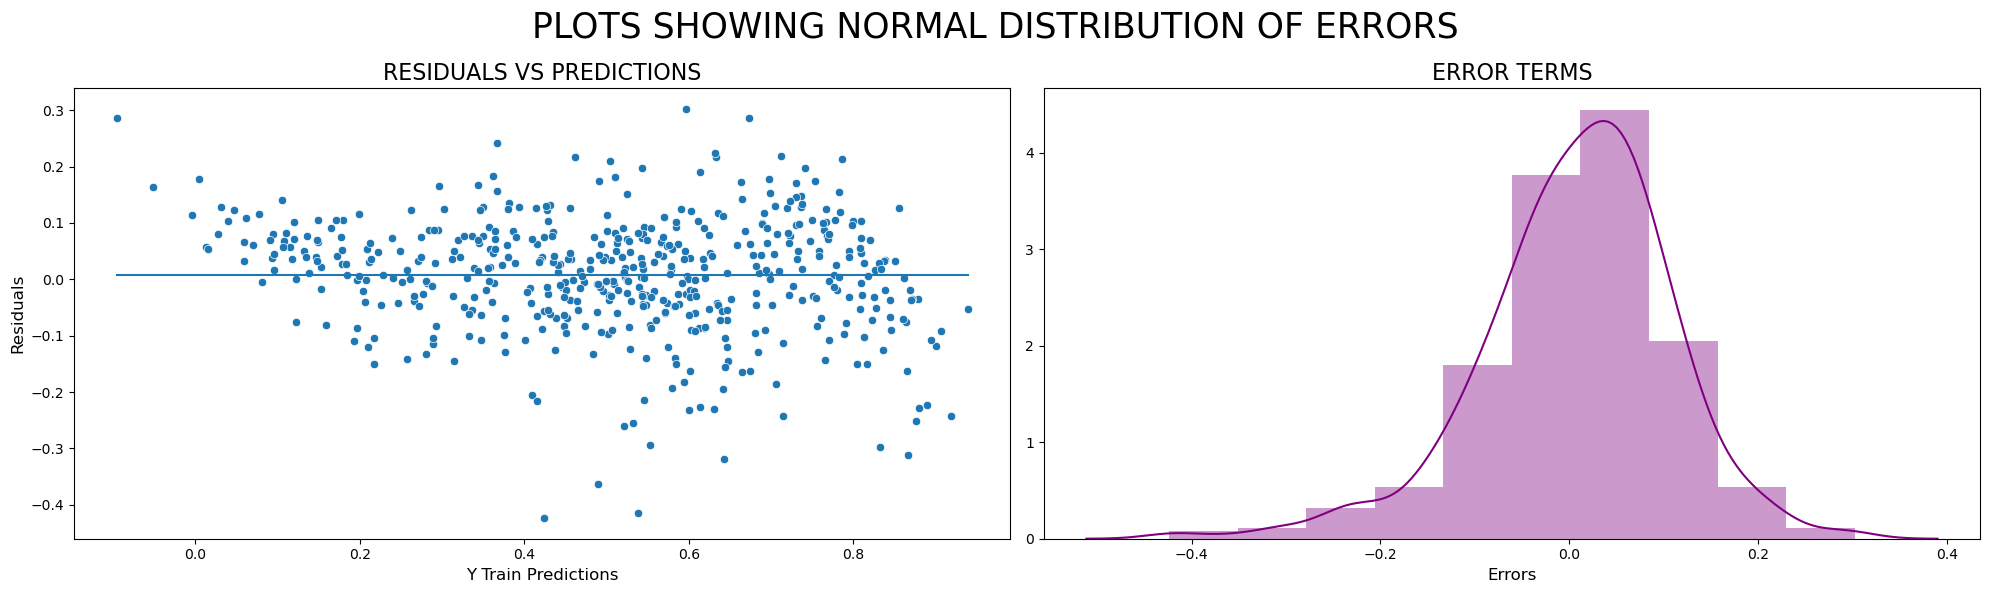

In [62]:
# Building Subplots
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(20,6))

#title
plt.suptitle('plots showing normal distribution of errors'.upper(), fontsize = 25)

# population plot 1
sns.scatterplot(y = residuals.values, x = ytrain_pred.values, palette  = 'Purples', ax = ax[0])
sns.lineplot(y = residuals.mean(), x = ytrain_pred.values, palette = 'Purples', ax = ax[0])

#Title ylabel and xlabel for plot 1
ax[0].set_title('residuals vs predictions'.upper(), fontsize = 16)
ax[0].set_ylabel('residuals'.title(), fontsize = 12)
ax[0].set_xlabel('y train predictions'.title(), fontsize = 12)

# Population plot 2
sns.distplot(residuals, bins = 10, color = 'Purple', ax = ax[1])

#Title ylabel and xlabel for plot 2
ax[1].set_title('error terms'.upper(), fontsize = 16)
ax[1].set_ylabel('')
ax[1].set_xlabel('errors'.title(), fontsize = 12)

plt.tight_layout()
plt.show()

######  Observation
 - Mean of residuals are close to 0
 - We can move to predict

####  Predicted values of the target variable on the test set.

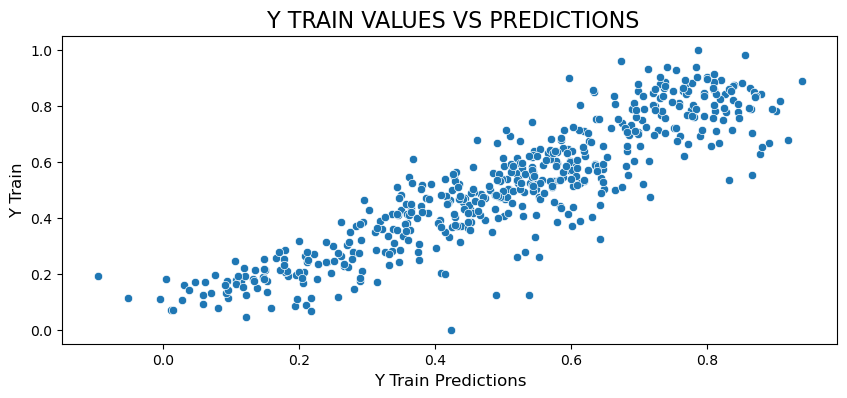

In [63]:
residuals = y_train - ytrain_pred

# plotting residual against predicted values

plt.figure(figsize= (10,4))

#plotting residuals
sns.scatterplot(y = y_train, x = ytrain_pred, palette= 'Purples')

# setting titles
plt.title(' y train values vs predictions'.upper(), fontsize = 16)
plt.ylabel('y train'.title(), fontsize = 12)
plt.xlabel('y train predictions'.title(), fontsize = 12)

plt.show()


###### Observation
- The plot shows almost constance variance of prediction and thus the error validation the assumption 

####  Testing for correlation between Error Terms

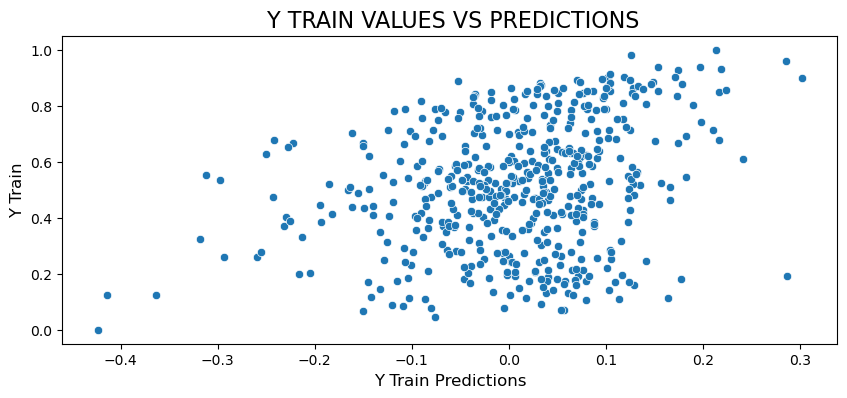

In [64]:
residuals = y_train - ytrain_pred

# plotting residual against predicted values

plt.figure(figsize= (10,4))

#plotting residuals
sns.scatterplot(y = y_train, x = residuals, palette= 'Purples')

# setting titles
plt.title(' y train values vs predictions'.upper(), fontsize = 16)
plt.ylabel('y train'.title(), fontsize = 12)
plt.xlabel('y train predictions'.title(), fontsize = 12)

plt.show()

#### Observation
- There is no correlation between Error Terms

## Now we can Make Predictions

In [65]:
b_test.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or snow,Misty and Cloudy
205,0,0,1,30.476653,36.047900,75.708300,6.084156,3840,0,0,...,0,0,0,0,0,0,0,1,0,0
268,0,0,1,26.615847,29.452100,84.833300,7.416900,4630,0,0,...,0,1,0,0,0,0,0,1,0,1
572,1,0,0,32.048347,36.710850,59.458300,10.250464,6904,0,0,...,0,0,0,1,0,0,0,0,0,0
550,1,0,1,33.927500,38.068350,45.791700,12.999943,6241,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,1,26.889153,30.618950,72.958300,15.416164,4758,0,1,...,0,0,1,0,0,0,0,0,0,0


In [66]:
# scaling  the variables and saving in our dataframe
b_test[scaler_list] = scaler.transform(b_test[scaler_list])

In [67]:
#scaler is already fitted 
# checking the test data post scaling
b_test.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or snow,Misty and Cloudy
42,0,0,1,0.203567,0.201994,0.560756,0.346253,0.166820,1,0,...,0,0,1,0,0,0,0,0,0,0
559,1,0,0,0.802708,0.770481,0.720481,0.217936,0.799241,0,0,...,0,0,0,0,1,0,0,0,0,1
685,1,0,0,0.331287,0.324632,0.562044,0.295436,0.645076,0,0,...,0,0,0,0,1,0,0,0,0,0
159,0,0,0,0.933543,0.890635,0.585659,0.231273,0.447883,0,1,...,0,0,0,1,0,0,0,0,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.677796,0.466061,0,0,...,0,1,0,0,0,0,0,1,0,1


### Checking the data into X_test and y_test

In [68]:
y_test = b_test.pop('cnt')
X_test = b_test

In [69]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or snow,Misty and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
X_test_new = X_test[X_train_6.columns]

In [71]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

## Evaluating the Predictions

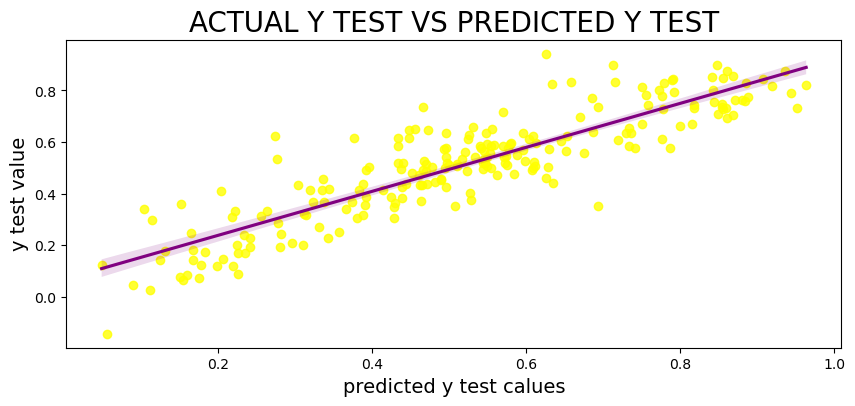

In [72]:
#plotting y_test and y_pred to check the spread
fig = plt.figure(figsize = (10, 4))

#ploting figure
sns.regplot( x = y_test, y = y_test_pred, scatter_kws= {'color': 'yellow'}, line_kws= {'color': 'purple'})

# setting titles
plt.title('actual y test vs predicted y test'.upper(), fontsize = 20)
plt.ylabel('y test value', fontsize = 14)
plt.xlabel('predicted y test calues', fontsize = 14)

plt.show()

######  Observations:
- Y Test values and Y Test predicted values have shown a strong visual semblance , Hence our predicted are evaluated as a healthy fit. 

### We can check here the Final Result 

In [73]:
print('R2 score of the test data predictions:', round(r2_score(y_pred = y_test_pred, y_true = y_test), 5))
print('R2 score of the train data predictions:', round(r2_score(y_pred = ytrain_pred, y_true = y_train), 5))
print('Absolute difference between R2 scores of the test and train dataset prediction:', abs(round(r2_score(y_pred = y_test_pred, y_true = y_test)- r2_score(y_pred= ytrain_pred,y_true = y_train), 5)))

R2 score of the test data predictions: 0.77369
R2 score of the train data predictions: 0.79497
Absolute difference between R2 scores of the test and train dataset prediction: 0.02129


##### Since  variation between train data prediction and test data prediction r2_score is less then 5%, Model is proven to be deoenable for the generalized.

In [74]:
const = 0.2526
parameter_series = pd.Series(lm.params)
print(parameter_series)

yr                    0.242359
holiday              -0.093525
temp                  0.731255
windspeed            -0.023368
spring                0.002756
winter                0.127931
Jul                  -0.101410
Sep                   0.054280
Light Rain or snow   -0.277501
Misty and Cloudy     -0.059752
dtype: float64


# FINAL REPORT

###### As per our final Model, the top 5 predictor variables that influences the bike booking are:

- Most important factor affecting demand is Temperature, With a coefficient of 0.73125, for every change in temperature of 1 degrees, demand increases by a factor of 0.73125 (temperature x 0.73125)

- Second most important factor is Light rain or snow with a coefficient of -0.27750. Hence, if a particular day has light rains, it is expected to reduce the demand by 27.7%.

- Third most important factor is Year with a coefficient value of 0.24235. Rest all internal and external factors remain unchanged, the companies expected to see annual growth over last year at around 24%.

- Fourth most important factor is Winter with a coefficient of 0.12793. This signifies the every winter , the demand is expected to increase by a factor of 0.12793 biased on other months.

- Fifth most important  factor is month of July with a coefficient weightage of -0.10141 which is signifies that every July the demand is expected to dropby a factor of 0.10141 (around 10%).